In [72]:
!pip install plotly

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Player data

In [75]:
player_df = pd.read_csv("drive/MyDrive/Colab Notebooks/SlamDunk/SlamDunkInsights_PlayerData.csv")
player_df

,Year,Rk,Player,Age,Team,Pos,G,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Player-additional
0,2024,1,Joel Embiid,29,PHI,C,39,39,33.6,11.5,...,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7,AS,embiijo01
1,2024,2,Luka Dončić,24,DAL,PG,70,70,37.5,11.5,...,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,MVP-3CPOY-6ASNBA1,doncilu01
2,2024,3,Giannis Antetokounmpo,29,MIL,PF,73,73,35.2,11.5,...,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,MVP-4DPOY-9CPOY-12ASNBA1,antetgi01
3,2024,4,Shai Gilgeous-Alexander,25,OKC,PG,75,75,34.0,10.6,...,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,MVP-2DPOY-7CPOY-3ASNBA1,gilgesh01
4,2024,5,Jalen Brunson,27,NYK,PG,77,77,35.4,10.3,...,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,MVP-5CPOY-5ASNBA2,brunsja01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577,2020,525,Marques Bolden,21,CLE,C,1,0,3.0,0.0,...,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,boldema01
3578,2020,526,William Howard,26,HOU,PF,2,0,6.5,0.0,...,1.0,1.0,0.5,0.0,0.0,0.5,0.5,0.0,NaN,howarwi01
3579,2020,527,Stanton Kidd,27,UTA,SG,4,0,3.8,0.0,...,0.8,0.8,0.3,0.0,0.0,0.5,0.8,0.0,NaN,kiddst01
3580,2020,528,J.P. Macura,24,CLE,SG,1,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,macurjp01


In [76]:
player_df.columns

Index(['Year', 'Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Awards', 'Player-additional'],
      dtype='object')

In [77]:
player_df['TS%'] = player_df['PTS'] / (2 * (player_df['FGA'] + 0.44 * player_df['FTA']))

In [78]:
player_df = player_df[player_df['MP'] > 5]

## Dropping col

In [79]:
player_df = player_df.drop(columns=["Awards",'Player-additional'],axis=1)
player_df

,Year,Rk,Player,Age,Team,Pos,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%
0,2024,1,Joel Embiid,29,PHI,C,39,39,33.6,11.5,...,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7,0.644886
1,2024,2,Luka Dončić,24,DAL,PG,70,70,37.5,11.5,...,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,0.617982
2,2024,3,Giannis Antetokounmpo,29,MIL,PF,73,73,35.2,11.5,...,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,0.646588
3,2024,4,Shai Gilgeous-Alexander,25,OKC,PG,75,75,34.0,10.6,...,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,0.636956
4,2024,5,Jalen Brunson,27,NYK,PG,77,77,35.4,10.3,...,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,0.591509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,2020,514,Brian Bowen,21,IND,SF,6,1,5.2,0.5,...,0.2,1.0,1.2,0.0,0.0,0.2,0.2,0.5,1.0,0.294118
3567,2020,515,Corey Brewer,33,SAC,PF,5,0,6.6,0.4,...,0.4,1.2,1.6,0.4,0.8,0.0,0.4,1.4,1.0,0.469925
3569,2020,517,Josh Gray,26,NOP,PG,2,0,11.5,0.5,...,0.5,0.5,1.0,1.0,0.0,0.0,2.5,0.5,1.0,0.500000
3574,2020,522,Joe Chealey,24,CHO,PG,4,0,8.3,0.0,...,0.0,0.0,0.0,0.3,1.0,0.0,0.5,0.5,0.5,0.123762


In [80]:
playercorr = player_df.corr(numeric_only = True)
playercorr.style.background_gradient(cmap='coolwarm')

,Year,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%
Year,1.000000,0.021370,0.030158,0.085990,0.037904,-0.010965,0.001644,-0.015800,0.047283,0.005096,-0.000442,0.024395,-0.000941,-0.022388,0.066845,0.066468,-0.022080,-0.028156,0.009991,0.021545,-0.054493,-0.034828,0.030049,-0.013464,-0.017514,-0.048482,-0.087109,-0.002584,0.053727
Rk,0.021370,1.000000,-0.071847,-0.535321,-0.700399,-0.891289,-0.911284,-0.905014,-0.248484,-0.676339,-0.676477,-0.248625,-0.806759,-0.822943,-0.160448,-0.292117,-0.747631,-0.741608,-0.274543,-0.304655,-0.671073,-0.604091,-0.646411,-0.580180,-0.335132,-0.743966,-0.602969,-0.910814,-0.356525
Age,0.030158,-0.071847,1.000000,0.018633,0.046968,0.115816,0.050951,0.054538,-0.012049,0.135109,0.115255,0.087204,-0.000238,-0.000049,-0.007429,0.055355,0.046023,0.022758,0.113503,-0.041679,0.077009,0.044650,0.156210,0.075510,0.002444,0.053286,0.052558,0.065037,0.062269
G,0.085990,-0.535321,0.018633,1.000000,0.641335,0.533365,0.461215,0.437025,0.232381,0.367042,0.345075,0.176881,0.396323,0.384950,0.176073,0.288786,0.339596,0.338884,0.156692,0.228067,0.397815,0.374083,0.321645,0.329823,0.217838,0.341678,0.364091,0.456684,0.308038
GS,0.037904,-0.700399,0.046968,0.641335,1.000000,0.783682,0.724408,0.702645,0.200167,0.489454,0.486033,0.116458,0.663415,0.664751,0.127940,0.209220,0.597480,0.601098,0.151406,0.348283,0.629957,0.587473,0.549637,0.514188,0.356420,0.609052,0.540421,0.718352,0.246375
MP,-0.010965,-0.891289,0.115816,0.533365,0.783682,1.000000,0.872516,0.881571,0.165650,0.675084,0.686225,0.212123,0.759186,0.783396,0.108178,0.218111,0.703241,0.698478,0.245945,0.323085,0.708526,0.638280,0.705289,0.697529,0.352618,0.759274,0.678776,0.872973,0.268097
FG,0.001644,-0.911284,0.050951,0.461215,0.724408,0.872516,1.000000,0.972278,0.274973,0.640654,0.641650,0.195932,0.932813,0.940720,0.172823,0.271993,0.840454,0.838859,0.217673,0.338298,0.710897,0.644931,0.698753,0.576450,0.350662,0.817705,0.569967,0.989737,0.328366
FGA,-0.015800,-0.905014,0.054538,0.437025,0.702645,0.881571,0.972278,1.000000,0.091567,0.734725,0.759359,0.200003,0.854631,0.901284,0.034497,0.122473,0.821609,0.805994,0.266382,0.204831,0.636289,0.545871,0.730897,0.594348,0.250873,0.825127,0.528623,0.978618,0.184614
FG%,0.047283,-0.248484,-0.012049,0.232381,0.200167,0.165650,0.274973,0.091567,1.000000,-0.135017,-0.223438,0.137481,0.402337,0.277474,0.767043,0.898889,0.190002,0.235931,-0.161687,0.518463,0.355764,0.434542,0.021112,0.060236,0.416153,0.122516,0.310167,0.220924,0.870824
3P,0.005096,-0.676339,0.135109,0.367042,0.489454,0.675084,0.640654,0.734725,-0.135017,1.000000,0.976121,0.441643,0.321616,0.383797,-0.084033,0.139431,0.461933,0.402846,0.366116,-0.209810,0.262774,0.131229,0.515967,0.433544,-0.042065,0.499928,0.281367,0.698132,0.174655


## Handling NaNs

In [81]:
player_df.fillna(0,inplace=True)

In [82]:
print(player_df["Pos"].unique())

['C' 'PG' 'PF' 'SG' 'SF']


In [83]:
player_df.shape

(3308, 32)

### Team Data

In [84]:
team_offense = pd.read_csv("drive/MyDrive/Colab Notebooks/SlamDunk/SlamDunkInsights_TeamData.csv")

In [85]:
team_defense = pd.read_csv("drive/MyDrive/Colab Notebooks/SlamDunk/TeamDefense.csv")
team_defense = team_defense.rename(columns={'season':'Year'})
team_defense = team_defense.drop('Rk', axis=1)

In [86]:
team_defense['Team'] = team_defense['Team'].str.replace('*', '', regex=False)
team_offense['Team'] = team_offense['Team'].str.replace('*', '', regex=False)

In [87]:
team_defense = team_defense.drop(['G', 'MP'], axis=1)
team_offense = team_offense.drop(['G', 'MP'], axis=1)

In [88]:
team_df = pd.merge(team_offense, team_defense, on=['Team', 'Year'])
team_df.head()

,Year,Rk,Team,FG_x,FGA_x,FG%_x,3P_x,3PA_x,3P%_x,2P_x,...,FT%_y,ORB_y,DRB_y,TRB_y,AST_y,STL_y,BLK_y,TOV_y,PF_y,PTS_y
0,2024,1,Indiana Pacers,47.0,92.7,0.507,13.2,35.3,0.374,33.8,...,0.787,11.0,32.4,43.4,24.6,6.6,5.4,13.9,18.3,120.2
1,2024,2,Boston Celtics,43.9,90.2,0.487,16.5,42.5,0.388,27.4,...,0.768,11.1,32.3,43.3,24.9,6.2,3.7,12.0,17.3,109.2
2,2024,3,Oklahoma City Thunder,44.5,89.3,0.499,13.3,34.2,0.389,31.3,...,0.789,11.8,32.9,44.7,26.9,7.1,5.1,15.7,18.9,112.7
3,2024,4,Milwaukee Bucks,43.1,88.5,0.487,14.2,38.1,0.373,29.0,...,0.807,10.3,33.7,44.0,26.5,7.1,4.2,12.0,19.2,116.4
4,2024,5,Atlanta Hawks,43.0,92.5,0.465,13.7,37.7,0.364,29.3,...,0.792,10.6,33.6,44.2,28.2,7.8,5.6,14.1,19.4,120.5


In [89]:
team_df['AWM'] = team_df['PTS_x'] - team_df['PTS_y']
team_df.sort_values(by='AWM', ascending=False)

,Year,Rk,Team,FG_x,FGA_x,FG%_x,3P_x,3PA_x,3P%_x,2P_x,...,ORB_y,DRB_y,TRB_y,AST_y,STL_y,BLK_y,TOV_y,PF_y,PTS_y,AWM
1,2024,2,Boston Celtics,43.9,90.2,0.487,16.5,42.5,0.388,27.4,...,11.1,32.3,43.3,24.9,6.2,3.7,12.0,17.3,109.2,11.4
120,2020,1,Milwaukee Bucks,43.3,90.9,0.476,13.8,38.9,0.355,29.5,...,9.5,36.3,45.8,24.2,7.4,4.5,14.1,21.7,108.6,10.1
93,2021,4,Utah Jazz,41.3,88.1,0.468,16.7,43.0,0.389,24.5,...,9.8,32.8,42.6,22.3,7.7,3.9,11.5,19.0,107.2,9.2
64,2022,5,Phoenix Suns,43.7,90.1,0.485,11.6,31.9,0.364,32.1,...,10.5,33.9,44.5,22.9,7.5,4.0,14.7,18.9,107.3,7.5
2,2024,3,Oklahoma City Thunder,44.5,89.3,0.499,13.3,34.2,0.389,31.3,...,11.8,32.9,44.7,26.9,7.1,5.1,15.7,18.9,112.7,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2021,29,Orlando Magic,38.3,89.2,0.429,10.9,31.8,0.343,27.4,...,9.8,37.6,47.4,26.0,7.6,5.3,12.7,18.7,113.3,-9.3
16,2024,17,Washington Wizards,43.0,91.4,0.470,12.4,35.5,0.348,30.6,...,12.1,36.8,48.9,29.0,8.0,6.0,14.0,18.0,123.0,-9.3
52,2023,23,San Antonio Spurs,43.1,92.6,0.465,11.1,32.2,0.345,32.0,...,10.7,34.3,45.0,26.8,8.1,5.3,13.8,18.5,123.1,-10.1
27,2024,28,Charlotte Hornets,40.0,87.0,0.460,12.1,34.0,0.355,28.0,...,10.6,34.8,45.4,28.7,7.1,4.8,13.6,17.5,116.8,-10.2


### Team EDA

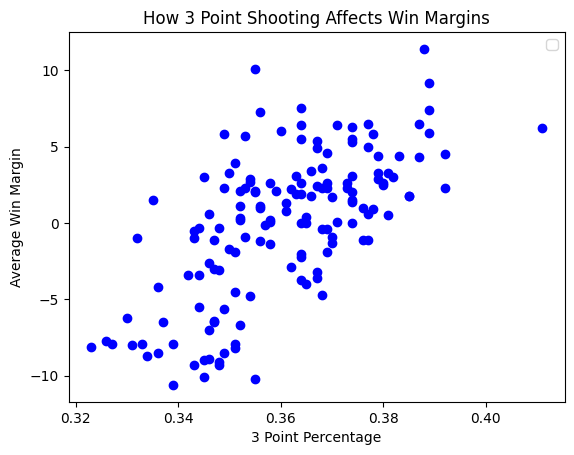

In [90]:
plt.scatter(team_df['3P%_x'], team_df['AWM'], color='blue')
plt.xlabel('3 Point Percentage')
plt.ylabel('Average Win Margin')
plt.title('How 3 Point Shooting Affects Win Margins')
plt.legend()
plt.show()

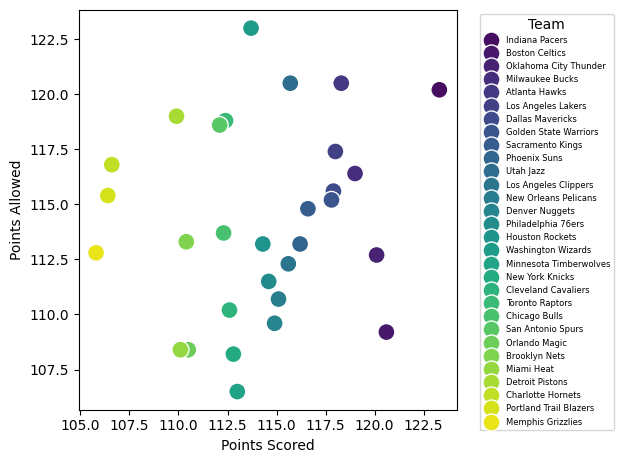

In [91]:
sns.scatterplot(data=team_df[team_df['Year'] == 2024], x='PTS_x', y='PTS_y', palette='viridis',hue='Team', s=150)

plt.xlabel('Points Scored')
plt.ylabel('Points Allowed')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Team', fontsize=6)
plt.tight_layout()
plt.show()

### Games EDA

In [92]:
games = pd.read_csv("drive/MyDrive/Colab Notebooks/SlamDunk/games.csv")
games.head()

,Date,Start (ET),Visitor/Neutral,VisitorScore,Home/Neutral,HomeScore,Attend.,Arena,season
0,2019-10-22,8:00p,New Orleans Pelicans,122,Toronto Raptors,130,20787.0,Scotiabank Arena,2020
1,2019-10-22,10:30p,Los Angeles Lakers,102,Los Angeles Clippers,112,19068.0,STAPLES Center,2020
2,2019-10-23,7:00p,Chicago Bulls,125,Charlotte Hornets,126,15424.0,Spectrum Center,2020
3,2019-10-23,7:00p,Detroit Pistons,119,Indiana Pacers,110,17923.0,Bankers Life Fieldhouse,2020
4,2019-10-23,7:00p,Cleveland Cavaliers,85,Orlando Magic,94,18846.0,Amway Center,2020


In [93]:
games['outcome'] = games['HomeScore'] - games['VisitorScore']
games['outcome'].describe()

,outcome
count,5749.000000
mean,1.979997
std,14.800745
min,-56.000000
25%,-8.000000
50%,3.000000
75%,11.000000
max,73.000000


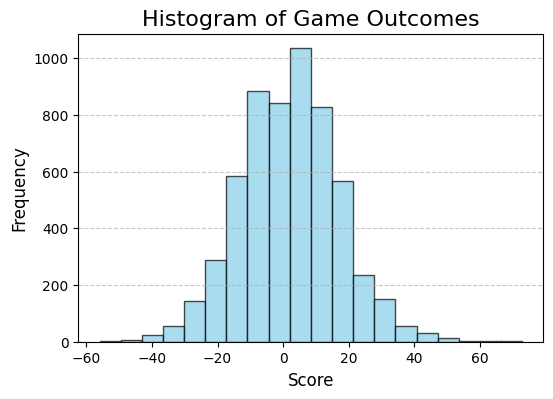

In [94]:
# Histogram

plt.figure(figsize=(6, 4))
plt.hist(games['outcome'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Histogram of Game Outcomes", fontsize=16)
plt.xlabel("Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-95-35efad458415>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




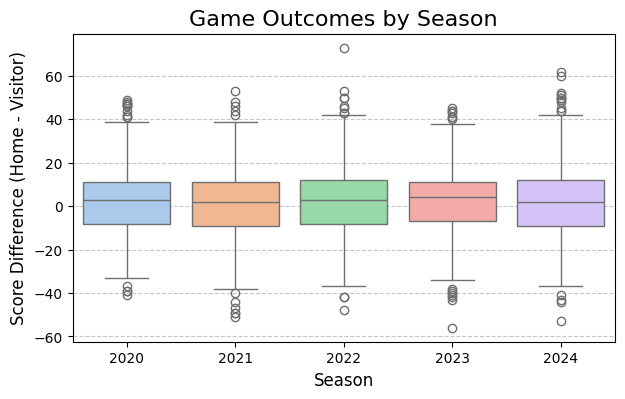

In [95]:
# Box plot

plt.figure(figsize=(7, 4))
sns.boxplot(x='season', y='outcome', data=games, palette='pastel')
plt.title('Game Outcomes by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Score Difference (Home - Visitor)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Label Encoding

In [96]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
player_df['Player'] = label_encoder.fit_transform(player_df['Player'])
player_df['Pos'] = label_encoder.fit_transform(player_df['Pos'])
player_df['Team'] = label_encoder.fit_transform(player_df['Team'])
player_df.head()

,Year,Rk,Player,Age,Team,Pos,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%
0,2024,1,428,29,25,0,39,39,33.6,11.5,...,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7,0.644886
1,2024,2,568,24,9,2,70,70,37.5,11.5,...,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,0.617982
2,2024,3,291,29,19,1,73,73,35.2,11.5,...,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,0.646588
3,2024,4,757,25,23,2,75,75,34.0,10.6,...,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,0.636956
4,2024,5,358,27,22,2,77,77,35.4,10.3,...,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,0.591509


In [97]:
player_df.columns

Index(['Year', 'Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'TS%'],
      dtype='object')

In [98]:
# player_advanced.columns

## Selecting Columns

In [99]:
cts = ['FG','FGA','2P','2PA','FT','FTA','PTS']
playercorr = player_df[cts].corr(numeric_only = True)
playercorr.style.background_gradient(cmap='coolwarm')

,FG,FGA,2P,2PA,FT,FTA,PTS
FG,1.000000,0.972278,0.932813,0.940720,0.840454,0.838859,0.989737
FGA,0.972278,1.000000,0.854631,0.901284,0.821609,0.805994,0.978618
2P,0.932813,0.854631,1.000000,0.980304,0.820129,0.845852,0.893380
2PA,0.940720,0.901284,0.980304,1.000000,0.836286,0.852837,0.911065
FT,0.840454,0.821609,0.820129,0.836286,1.000000,0.984570,0.884977
FTA,0.838859,0.805994,0.845852,0.852837,0.984570,1.000000,0.872499
PTS,0.989737,0.978618,0.893380,0.911065,0.884977,0.872499,1.000000


## Standardization


In [100]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaled_col = scaler.fit_transform(player_df[cts])
splayer_df = pd.DataFrame(scaled_col, columns=cts, index=player_df.index)
splayer_df = pd.concat([player_df.drop(cts, axis=1), splayer_df], axis=1)

splayer_df


,Year,Rk,Player,Age,Team,Pos,G,GS,MP,FG%,...,TOV,PF,TS%,FG,FGA,2P,2PA,FT,FTA,PTS
0,2024,1,428,29,25,0,39,39,33.6,0.529,...,3.8,2.9,0.644886,3.142857,2.741379,4.000000,3.846154,7.666667,6.4375,3.618421
1,2024,2,568,24,9,2,70,70,37.5,0.487,...,4.0,2.1,0.617982,3.142857,3.051724,2.666667,2.487179,4.833333,4.6250,3.513158
2,2024,3,291,29,19,1,73,73,35.2,0.611,...,3.4,2.9,0.646588,3.142857,2.224138,4.380952,3.538462,5.000000,5.8750,3.052632
3,2024,4,757,25,23,2,75,75,34.0,0.535,...,2.2,2.5,0.636956,2.821429,2.396552,3.571429,3.307692,5.500000,4.6250,3.013158
4,2024,5,358,27,22,2,77,77,35.4,0.479,...,2.4,1.9,0.591509,2.714286,2.672414,2.714286,2.897436,3.750000,3.2500,2.828947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,2020,514,82,21,14,3,6,1,5.2,0.300,...,0.2,0.5,0.294118,-0.785714,-0.724138,-0.619048,-0.512821,-0.833333,-0.8125,-0.815789
3567,2020,515,145,33,28,1,5,0,6.6,0.500,...,0.4,1.4,0.469925,-0.821429,-0.879310,-0.666667,-0.692308,-0.666667,-0.4375,-0.815789
3569,2020,517,457,26,21,2,2,0,11.5,0.500,...,2.5,0.5,0.500000,-0.785714,-0.844828,-0.619048,-0.589744,-0.833333,-0.8125,-0.815789
3574,2020,522,424,24,7,2,4,0,8.3,0.000,...,0.5,0.5,0.123762,-0.964286,-0.706897,-0.857143,-0.641026,-0.416667,-0.5000,-0.881579


## K-Means Clustering


### Dimensionality Reduction - PCA

In [101]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_data = pca.fit_transform(splayer_df[cts])

explained_variance_ratio = pca.explained_variance_ratio_
variance_df = pd.DataFrame(explained_variance_ratio, columns=['Explained Variance Ratio'], index=['PC1', 'PC2','PC3'])
print(variance_df)
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
print("Cumulative Explained Variance Ratio:")
print(cumulative_variance_ratio)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3'], index=cts)
print(loadings)


     Explained Variance Ratio
PC1                  0.904125
PC2                  0.062602
PC3                  0.026313
Cumulative Explained Variance Ratio:
[0.90412497 0.96672744 0.99304037]
          PC1       PC2       PC3
FG   0.338225 -0.328081 -0.185249
FGA  0.326363 -0.322545 -0.498882
2P   0.356903 -0.288777  0.601543
2PA  0.351895 -0.286781  0.418302
FT   0.469267  0.572444 -0.115238
FTA  0.430883  0.507872  0.124191
PTS  0.349299 -0.192524 -0.388930


### Elbow Graph

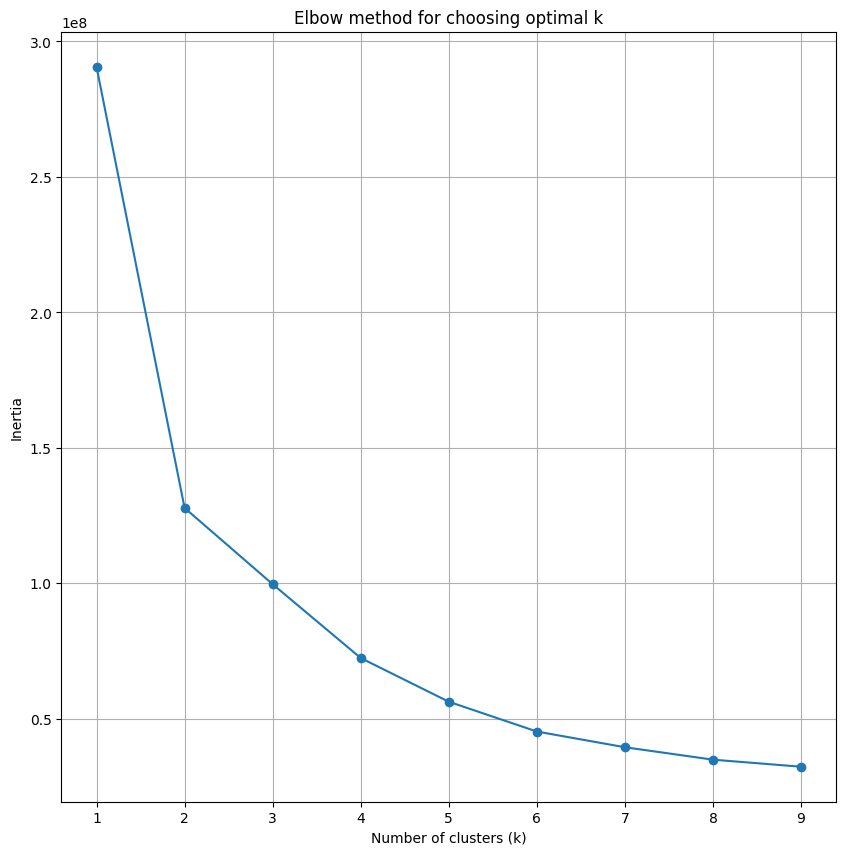

In [102]:
from sklearn.cluster import KMeans

ks = []
k_range = range(1,10)
for k in k_range:
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(splayer_df)
  ks.append(kmeans.inertia_)

plt.figure(figsize=(10,10))
plt.plot(k_range,ks,marker='o')
plt.title("Elbow method for choosing optimal k")
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

### Silhouette Graph

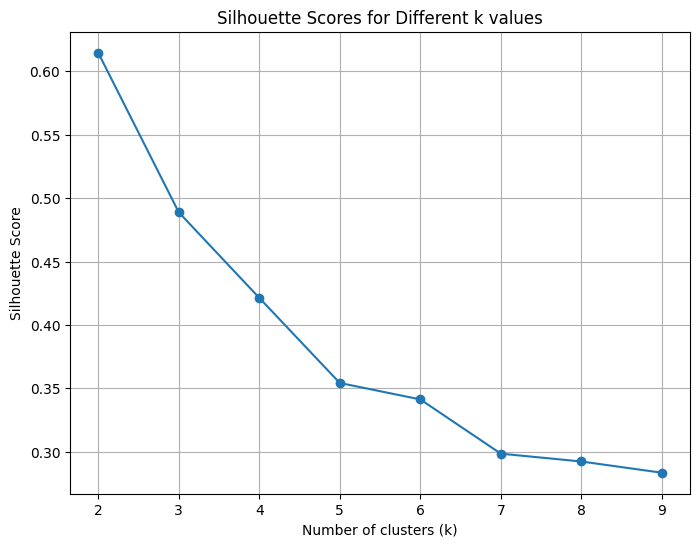

Best k: 2 with silhouette score: 0.6146859375117709


In [103]:
from sklearn.metrics import silhouette_score

# Trying different values of k
k_values = range(2, 10)  # Start from 2 to avoid k=1 (which doesn't make sense)
sil_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(splayer_df[cts])
    score = silhouette_score(splayer_df[cts], clusters)
    sil_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, sil_scores, marker='o')
plt.title("Silhouette Scores for Different k values")
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Print the best k and its silhouette score
best_k = k_values[sil_scores.index(max(sil_scores))]
print(f"Best k: {best_k} with silhouette score: {max(sil_scores)}")


### KMeans Cluster

In [104]:
# import plotly.graph_objects as go

# k = 2
# kmeans = KMeans(n_clusters = k,random_state=42)
# clusters = kmeans.fit_predict(splayer_df[cts])
# kmeans_plot = pd.DataFrame(pca_data,columns=['PC1','PC2'])
# kmeans_plot['Cluster'] = clusters

# centroids = pca.transform(kmeans.cluster_centers_)

# fig = go.Figure()

# for cluster_id in range(3):
#     cluster_data = kmeans_plot[kmeans_plot['Cluster'] == cluster_id]
#     fig.add_trace(
#         go.Scatter(
#             x=cluster_data["PC1"],
#             y=cluster_data["PC2"],
#             mode='markers',
#             marker=dict(size=5),
#             name=f'Cluster {cluster_id}',
#         )
#     )

# fig.add_trace(
#     go.Scatter(
#         x=centroids[:, 0],  # PC1
#         y=centroids[:, 1],  # PC2
#         mode='markers',
#         marker=dict(size=10, color='black', symbol='x'),
#         name='Centroids',
#     )
# )

# fig.update_layout(
#     title="KMeans Clustering (2D)",
#     xaxis_title="PC1",
#     yaxis_title="PC2",
#     legend=dict(x=0, y=1),
# )

# fig.show()


In [105]:
import plotly.graph_objects as go
k=2
kmeans = KMeans(n_clusters = k,random_state=42)
clusters = kmeans.fit_predict(splayer_df[cts])
kmeans_plot = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])
kmeans_plot['Cluster'] = clusters

centroids = pca.transform(kmeans.cluster_centers_)

fig = go.Figure()


for cluster_id in range(k):
    cluster_data = kmeans_plot[kmeans_plot['Cluster'] == cluster_id]
    fig.add_trace(
        go.Scatter3d(
            x=cluster_data["PC1"],
            y=cluster_data["PC2"],
            z=cluster_data["PC3"],  # Third PCA component
            mode='markers',
            marker=dict(size=5),
            name=f'Cluster {cluster_id}',
        )
    )


fig.add_trace(
    go.Scatter3d(
        x=centroids[:, 0],  # PC1
        y=centroids[:, 1],  # PC2
        z=centroids[:, 2],  # PC3
        mode='markers',
        marker=dict(size=10, color='black', symbol='x'),
        name='Centroids',
    )
)


fig.update_layout(
    title="KMeans Clustering (3D)",
    scene=dict(
        xaxis_title="PC1",
        yaxis_title="PC2",
        zaxis_title="PC3",
    ),
    legend=dict(x=0, y=1),
)

fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



# Team data

In [106]:
team_offense = pd.read_csv("drive/MyDrive/Colab Notebooks/SlamDunk/SlamDunkInsights_TeamData.csv")
team_offense

,Year,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2024,1,Indiana Pacers*,82,240.3,47.0,92.7,0.507,13.2,35.3,...,0.782,10.1,31.4,41.5,30.8,7.7,5.9,12.9,21.4,123.3
1,2024,2,Boston Celtics*,82,241.8,43.9,90.2,0.487,16.5,42.5,...,0.807,10.7,35.6,46.3,26.9,6.8,6.6,11.9,16.2,120.6
2,2024,3,Oklahoma City Thunder*,82,241.5,44.5,89.3,0.499,13.3,34.2,...,0.825,8.8,33.2,42.0,27.1,8.5,6.6,12.7,18.8,120.1
3,2024,4,Milwaukee Bucks*,82,241.5,43.1,88.5,0.487,14.2,38.1,...,0.774,9.4,34.8,44.2,26.5,6.8,5.0,12.9,19.2,119.0
4,2024,5,Atlanta Hawks,82,242.1,43.0,92.5,0.465,13.7,37.7,...,0.797,12.5,32.2,44.7,26.6,7.5,4.5,13.5,18.6,118.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2020,26,Cleveland Cavaliers,65,241.9,40.3,87.9,0.458,11.2,31.8,...,0.758,10.8,33.4,44.2,23.1,6.9,3.2,16.5,18.3,106.9
146,2020,27,Chicago Bulls,65,241.2,39.6,88.6,0.447,12.2,35.1,...,0.755,10.5,31.4,41.9,23.2,10.0,4.1,15.5,21.8,106.8
147,2020,28,Golden State Warriors,65,241.9,38.6,88.2,0.438,10.4,31.3,...,0.803,10.0,32.9,42.8,25.6,8.2,4.6,14.9,20.1,106.3
148,2020,29,New York Knicks,66,241.9,40.0,89.3,0.447,9.6,28.4,...,0.694,12.0,34.5,46.5,22.1,7.6,4.7,14.3,22.2,105.8


In [107]:
team_offense.columns

Index(['Year', 'Rk', 'Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

## Missing

In [108]:
team_offense.isna().sum()

,0
Year,0
Rk,0
Team,0
G,0
MP,0
FG,0
FGA,0
FG%,0
3P,0
3PA,0


In [109]:
team_defense = pd.read_csv("drive/MyDrive/Colab Notebooks/SlamDunk/TeamDefense.csv")
team_defense = team_defense.rename(columns={'season':'Year'})
team_defense = team_defense.drop('Rk', axis=1)
team_defense

,Year,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2024,Minnesota Timberwolves*,82,241.5,39.0,86.8,0.450,11.4,32.3,0.354,...,0.781,10.3,31.2,41.4,24.5,7.5,4.5,14.2,19.9,106.5
1,2024,New York Knicks*,82,240.6,40.3,85.7,0.470,12.5,34.3,0.365,...,0.764,10.2,30.4,40.6,25.6,6.7,5.3,13.2,19.1,108.2
2,2024,Orlando Magic*,82,241.2,39.8,84.0,0.474,11.5,32.1,0.358,...,0.780,8.9,30.9,39.9,23.9,8.1,4.6,15.0,20.9,108.4
3,2024,Miami Heat*,82,240.9,40.2,86.0,0.467,13.0,36.8,0.353,...,0.780,9.2,33.5,42.8,26.5,6.6,4.7,13.7,18.9,108.4
4,2024,Boston Celtics*,82,241.8,41.5,91.6,0.453,12.9,36.7,0.352,...,0.768,11.1,32.3,43.3,24.9,6.2,3.7,12.0,17.3,109.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2020,Portland Trail Blazers*,74,241.0,41.8,91.6,0.456,13.6,35.4,0.383,...,0.771,11.5,35.4,46.9,24.9,6.8,4.9,12.9,20.1,116.1
146,2020,New Orleans Pelicans,72,242.1,42.7,91.8,0.465,12.2,33.9,0.361,...,0.789,10.1,34.7,44.8,24.5,8.5,4.8,14.5,21.1,117.1
147,2020,Minnesota Timberwolves,64,243.1,43.1,90.4,0.477,11.6,31.9,0.363,...,0.783,10.1,37.2,47.3,24.4,7.8,5.5,15.5,21.6,117.5
148,2020,Washington Wizards,72,241.0,43.1,88.4,0.488,12.4,33.1,0.376,...,0.778,10.5,35.7,46.2,25.2,7.5,5.0,16.2,22.2,119.1


In [110]:
team_defense['Team'] = team_defense['Team'].str.replace('*', '', regex=False)
team_offense['Team'] = team_offense['Team'].str.replace('*', '', regex=False)

team_defense = team_defense.drop(['G', 'MP'], axis=1)
team_offense = team_offense.drop(['G', 'MP'], axis=1)

In [111]:
team_df = pd.merge(team_offense, team_defense, on=['Team', 'Year'])
team_df.head()

,Year,Rk,Team,FG_x,FGA_x,FG%_x,3P_x,3PA_x,3P%_x,2P_x,...,FT%_y,ORB_y,DRB_y,TRB_y,AST_y,STL_y,BLK_y,TOV_y,PF_y,PTS_y
0,2024,1,Indiana Pacers,47.0,92.7,0.507,13.2,35.3,0.374,33.8,...,0.787,11.0,32.4,43.4,24.6,6.6,5.4,13.9,18.3,120.2
1,2024,2,Boston Celtics,43.9,90.2,0.487,16.5,42.5,0.388,27.4,...,0.768,11.1,32.3,43.3,24.9,6.2,3.7,12.0,17.3,109.2
2,2024,3,Oklahoma City Thunder,44.5,89.3,0.499,13.3,34.2,0.389,31.3,...,0.789,11.8,32.9,44.7,26.9,7.1,5.1,15.7,18.9,112.7
3,2024,4,Milwaukee Bucks,43.1,88.5,0.487,14.2,38.1,0.373,29.0,...,0.807,10.3,33.7,44.0,26.5,7.1,4.2,12.0,19.2,116.4
4,2024,5,Atlanta Hawks,43.0,92.5,0.465,13.7,37.7,0.364,29.3,...,0.792,10.6,33.6,44.2,28.2,7.8,5.6,14.1,19.4,120.5


In [112]:
team_df.shape

(150, 45)

In [113]:
games = pd.read_csv("drive/MyDrive/Colab Notebooks/SlamDunk/games.csv")

In [114]:
games.head()

,Date,Start (ET),Visitor/Neutral,VisitorScore,Home/Neutral,HomeScore,Attend.,Arena,season
0,2019-10-22,8:00p,New Orleans Pelicans,122,Toronto Raptors,130,20787.0,Scotiabank Arena,2020
1,2019-10-22,10:30p,Los Angeles Lakers,102,Los Angeles Clippers,112,19068.0,STAPLES Center,2020
2,2019-10-23,7:00p,Chicago Bulls,125,Charlotte Hornets,126,15424.0,Spectrum Center,2020
3,2019-10-23,7:00p,Detroit Pistons,119,Indiana Pacers,110,17923.0,Bankers Life Fieldhouse,2020
4,2019-10-23,7:00p,Cleveland Cavaliers,85,Orlando Magic,94,18846.0,Amway Center,2020


# Game data

## Preprocessing - Teams

In [115]:
ranks = team_df.head(30)[['Rk', 'Team']]
ids = ranks.set_index('Team').to_dict()['Rk']
print(ids)

{'Indiana Pacers': 1, 'Boston Celtics': 2, 'Oklahoma City Thunder': 3, 'Milwaukee Bucks': 4, 'Atlanta Hawks': 5, 'Los Angeles Lakers': 6, 'Dallas Mavericks': 7, 'Golden State Warriors': 8, 'Sacramento Kings': 9, 'Phoenix Suns': 10, 'Utah Jazz': 11, 'Los Angeles Clippers': 12, 'New Orleans Pelicans': 13, 'Denver Nuggets': 14, 'Philadelphia 76ers': 15, 'Houston Rockets': 16, 'Washington Wizards': 17, 'Minnesota Timberwolves': 18, 'New York Knicks': 19, 'Cleveland Cavaliers': 20, 'Toronto Raptors': 21, 'Chicago Bulls': 22, 'San Antonio Spurs': 23, 'Orlando Magic': 24, 'Brooklyn Nets': 25, 'Miami Heat': 26, 'Detroit Pistons': 27, 'Charlotte Hornets': 28, 'Portland Trail Blazers': 29, 'Memphis Grizzlies': 30}


In [116]:
team_df['ID'] = team_df['Team'].map(ids)

In [117]:
teams = team_df.drop(['Rk', 'Team'], axis=1)

## Preprocessing - Games | Merge

In [118]:
games['HomeID'] = games['Home/Neutral'].map(ids)
games['VisitorID'] = games['Visitor/Neutral'].map(ids)

In [119]:
games = games.drop(['Attend.', 'Arena', 'Start (ET)', 'Date', 'Home/Neutral', 'Visitor/Neutral'], axis=1)

In [120]:
home = pd.merge(games, teams, left_on=['HomeID', 'season'], right_on=['ID', 'Year'])
home.head()

,VisitorScore,HomeScore,season,HomeID,VisitorID,Year,FG_x,FGA_x,FG%_x,3P_x,...,ORB_y,DRB_y,TRB_y,AST_y,STL_y,BLK_y,TOV_y,PF_y,PTS_y,ID
0,122,130,2020,21,13,2020,40.2,87.9,0.458,13.8,...,10.9,35.1,46.1,25.6,7.2,5.5,16.8,20.4,106.5,21
1,102,112,2020,12,6,2020,41.6,89.2,0.466,12.4,...,10.7,34.6,45.3,23.7,7.5,4.7,14.1,22.9,109.9,12
2,125,126,2020,28,22,2020,37.3,85.9,0.434,12.1,...,10.9,35.0,46.0,26.6,8.0,5.0,14.4,20.6,109.6,28
3,119,110,2020,1,27,2020,42.1,88.5,0.476,10.2,...,10.4,34.9,45.2,23.1,6.9,4.6,14.7,18.8,107.5,1
4,85,94,2020,24,20,2020,39.3,88.6,0.444,11.1,...,9.0,35.8,44.9,24.7,7.0,4.6,14.6,19.5,108.3,24


In [121]:
all_games = pd.merge(home, teams, left_on=['VisitorID', 'season'], right_on=['ID', 'Year'])
all_games.head()

,VisitorScore,HomeScore,season,HomeID,VisitorID,Year_x,FG_x_x,FGA_x_x,FG%_x_x,3P_x_x,...,ORB_y_y,DRB_y_y,TRB_y_y,AST_y_y,STL_y_y,BLK_y_y,TOV_y_y,PF_y_y,PTS_y_y,ID_y
0,122,130,2020,21,13,2020,40.2,87.9,0.458,13.8,...,10.1,34.7,44.8,24.5,8.5,4.8,14.5,21.1,117.1,13
1,102,112,2020,12,6,2020,41.6,89.2,0.466,12.4,...,9.4,32.9,42.3,23.4,8.2,3.7,15.9,21.7,107.6,6
2,125,126,2020,28,22,2020,37.3,85.9,0.434,12.1,...,10.2,35.4,45.5,25.4,8.2,5.9,18.3,19.2,109.9,22
3,119,110,2020,1,27,2020,42.1,88.5,0.476,10.2,...,10.1,33.4,43.5,24.6,8.2,5.6,14.0,19.8,110.8,27
4,85,94,2020,24,20,2020,39.3,88.6,0.444,11.1,...,9.7,33.1,42.9,26.1,9.4,6.3,13.0,19.6,114.8,20


In [122]:
scores = all_games['HomeScore'] - all_games['VisitorScore']
all_games = all_games.drop(['HomeID', 'VisitorID', 'season', 'Year_x', 'Year_y', 'ID_x', 'ID_y', 'VisitorScore', 'HomeScore'], axis=1)

## BASELINE MODEL (Teams)

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [124]:
model = LinearRegression()
cv_scores = -cross_val_score(model, all_games, scores, cv=5, scoring='neg_mean_squared_error')
print(cv_scores)
print(np.mean(cv_scores))

[164.1748743  191.60945432 185.89189193 162.01112607 193.96064591]
179.52959850736437


## PLAYER-BASED MODEL

In [125]:
games = pd.read_csv("drive/MyDrive/Colab Notebooks/SlamDunk/games_with_players.csv")

In [126]:
# Preprocess Game Data

games['players'] = games['players'].apply(ast.literal_eval)

games['home_starters'] = games['players'].apply(lambda x: x[1][0])
games['home_reserves'] = games['players'].apply(lambda x: x[1][1])
games['visitor_starters'] = games['players'].apply(lambda x: x[0][0])
games['visitor_reserves'] = games['players'].apply(lambda x: x[0][1])

games = games.drop(['Unnamed: 0', 'Attend.', 'Arena', 'players'], axis=1)
games = games.rename(columns={'Home/Neutral': 'home_team', 'Visitor/Neutral': 'visitor_team'})
games['game_id'] = games.index

In [127]:
team_dict = {'Atlanta Hawks': 'ATL',
 'Boston Celtics': 'BOS',
 'Brooklyn Nets': 'BKN',
 'Charlotte Hornets': 'CHA',
 'Chicago Bulls': 'CHI',
 'Cleveland Cavaliers': 'CLE',
 'Dallas Mavericks': 'DAL',
 'Denver Nuggets': 'DEN',
 'Detroit Pistons': 'DET',
 'Golden State Warriors': 'GSW',
 'Houston Rockets': 'HOU',
 'Indiana Pacers': 'IND',
 'Los Angeles Clippers': 'LAC',
 'Los Angeles Lakers': 'LAL',
 'Memphis Grizzlies': 'MEM',
 'Miami Heat': 'MIA',
 'Milwaukee Bucks': 'MIL',
 'Minnesota Timberwolves':  'MIN',
 'New Orleans Pelicans': 'NOP',
 'New York Knicks': 'NYK',
 'Oklahoma City Thunder': 'OKC',
 'Orlando Magic': 'ORL',
 'Philadelphia 76ers': 'PHI',
 'Phoenix Suns': 'PHO',
 'Portland Trail Blazers': 'POR',
 'Sacramento Kings': 'SAC',
 'San Antonio Spurs': 'SAS',
 'Toronto Raptors': 'TOR',
 'Utah Jazz': 'UTA',
 'Washington Wizards': 'WAS'}

games['home_team'] = games['home_team'].apply(lambda x: team_dict[x])
games['visitor_team'] = games['visitor_team'].apply(lambda x: team_dict[x])

In [128]:
# Player Data

player_reg = pd.read_csv("drive/MyDrive/Colab Notebooks/SlamDunk/SlamDunkInsights_PlayerData.csv")
player_adv = pd.read_csv("drive/MyDrive/Colab Notebooks/SlamDunk/PlayerAdvanced.csv")

In [129]:
# Delete duplicate columns

player_reg = player_reg.rename(columns={'Year': 'season'})
player_reg = player_reg.drop(['Rk', 'Age', 'Pos', 'G', 'GS', 'MP', 'Awards', 'Player-additional'], axis=1)

player_reg = player_reg.loc[player_reg['Team'] != '2TM']
player_reg = player_reg.loc[player_reg['Team'] != '3TM']
player_reg = player_reg.loc[player_reg['Team'] != '4TM']

# Merge player stats

players = pd.merge(player_reg, player_adv, left_on=['season', 'Player', 'Team'], right_on=['season', 'Player', 'Team'])
players = players.drop(['Rk', 'Awards', 'Player-additional'], axis=1)

In [130]:
# Merge player stats with games

def merge_starters(games, players, stats, side):
    exploded_df = games.explode(f'{side}_starters')

    merged_df = exploded_df.merge(players, left_on=[f'{side}_starters', f'{side}_team', 'season'], right_on=['Player', 'Team', 'season'])

    agg_dict = {stat: lambda x: x.tolist() for stat in stats}
    grouped_df = merged_df.groupby('game_id').agg(agg_dict).reset_index()
    games_with_stats = pd.merge(games, grouped_df, on='game_id')

    expanded_columns = {}
    for stat in stats:
        # Ensure that the list in each row corresponds to the 5 players (1 row per game)
        expanded_columns[stat] = pd.DataFrame(
            games_with_stats[stat].tolist(),
            columns=[f'{stat}_player{i+1}_{side}' for i in range(5)]
        )

    expanded_df = pd.concat(expanded_columns.values(), axis=1)
    final_df = pd.concat([games_with_stats.drop(stats, axis=1), expanded_df], axis=1)

    return final_df

In [131]:
players.columns

Index(['season', 'Player', 'Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Age', 'Pos', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP'],
      dtype='object')

In [132]:
# Pick stats to include in the model

stats = ['WS', 'PER', 'TS%', '3P%', 'BPM', 'PTS']

In [133]:
df = merge_starters(games, players, stats, 'home')
df = merge_starters(df, players, stats, 'visitor')
df = df.fillna(0)
df.columns

Index(['Date', 'Start (ET)', 'visitor_team', 'VisitorScore', 'home_team',
       'HomeScore', 'season', 'home_starters', 'home_reserves',
       'visitor_starters', 'visitor_reserves', 'game_id', 'WS_player1_home',
       'WS_player2_home', 'WS_player3_home', 'WS_player4_home',
       'WS_player5_home', 'PER_player1_home', 'PER_player2_home',
       'PER_player3_home', 'PER_player4_home', 'PER_player5_home',
       'TS%_player1_home', 'TS%_player2_home', 'TS%_player3_home',
       'TS%_player4_home', 'TS%_player5_home', '3P%_player1_home',
       '3P%_player2_home', '3P%_player3_home', '3P%_player4_home',
       '3P%_player5_home', 'BPM_player1_home', 'BPM_player2_home',
       'BPM_player3_home', 'BPM_player4_home', 'BPM_player5_home',
       'PTS_player1_home', 'PTS_player2_home', 'PTS_player3_home',
       'PTS_player4_home', 'PTS_player5_home', 'WS_player1_visitor',
       'WS_player2_visitor', 'WS_player3_visitor', 'WS_player4_visitor',
       'WS_player5_visitor', 'PER_player1_vi

In [134]:
# MODELING

df['outcome'] = df['HomeScore'] - df['VisitorScore']
y = df['outcome']
drop_cols = ['Date', 'Start (ET)', 'visitor_team', 'home_team', 'VisitorScore', 'HomeScore', 'season', 'home_starters', 'home_reserves',
       'visitor_starters', 'visitor_reserves', 'game_id']
df = df.drop(drop_cols, axis=1)
x = df.drop(['outcome'], axis=1)

In [135]:
# Standardize features

from sklearn.preprocessing import StandardScaler

cols = x.columns

scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns=cols)

In [136]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

lr = LinearRegression()
xgb = XGBRegressor()
lasso = Lasso(alpha=0.2)
ridge = Ridge(alpha=1.0)
svr = SVR(kernel='linear', C=75, epsilon=0.1)

In [137]:
# Cross Validation

model = lasso

cv = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
neg_mse_scores = cross_val_score(model, x, y, scoring=mse_scorer, cv=cv)

mse_scores = -neg_mse_scores

print("MSE Scores for each fold:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Standard Deviation of MSE:", np.std(mse_scores))

MSE Scores for each fold: [160.72249103 168.3044071  174.36379889 161.27914275 186.36579067]
Mean MSE: 170.20712608842285
Standard Deviation of MSE: 9.50439791064197


In [138]:
# Train Test Split

model = lasso
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Drop outliers from training data
df_train = pd.concat([x_train, y_train], axis=1)
df_train = df_train[(df_train['outcome'] < 40) & (df_train['outcome'] > -40)]
y_train = df_train['outcome']
x_train = df_train.drop(['outcome'], axis=1)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 163.07180253766833


In [139]:
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.axhline(0, color='red', linestyle='--', linewidth=2)
    plt.title(f'Residual Plot: {model_name}', fontsize=16)
    plt.xlabel('Predicted Values', fontsize=12)
    plt.ylabel('Residuals', fontsize=12)
    plt.grid(alpha=0.5)
    plt.show()

def plot_predicted_vs_actual(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.7, label='Predictions')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Ideal Fit')
    plt.title(f'Predicted vs Actual: {model_name}', fontsize=16)
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()

def plot_residual_distribution(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, color='blue', bins=30)
    plt.axvline(0, color='red', linestyle='--', linewidth=2)
    plt.title(f'Residual Distribution: {model_name}', fontsize=16)
    plt.xlabel('Residuals', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(alpha=0.5)
    plt.show()

def plot_cv_scores(model_names, cv_scores):
    plt.figure(figsize=(10, 6))
    plt.boxplot(cv_scores, labels=model_names, patch_artist=True)
    plt.title('Cross-Validation Scores by Model', fontsize=16)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('CV Score', fontsize=12)
    plt.grid(alpha=0.5)
    plt.show()

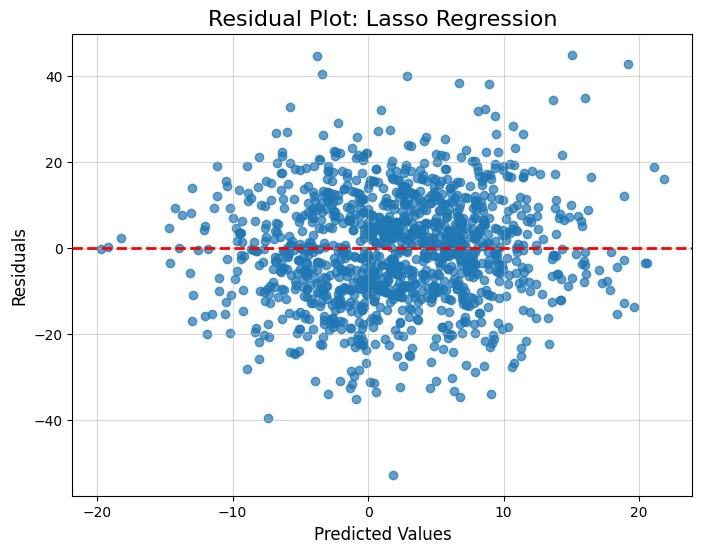

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

model.fit(x_train, y_train)
y_true = y_test
y_pred = model.predict(x_test)

plot_residuals(y_true, y_pred, 'Lasso Regression')

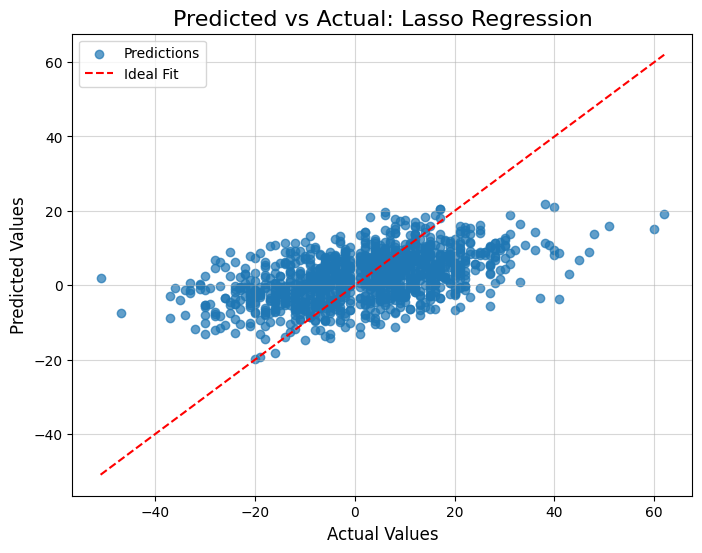

In [141]:
plot_predicted_vs_actual(y_true, y_pred, 'Lasso Regression')

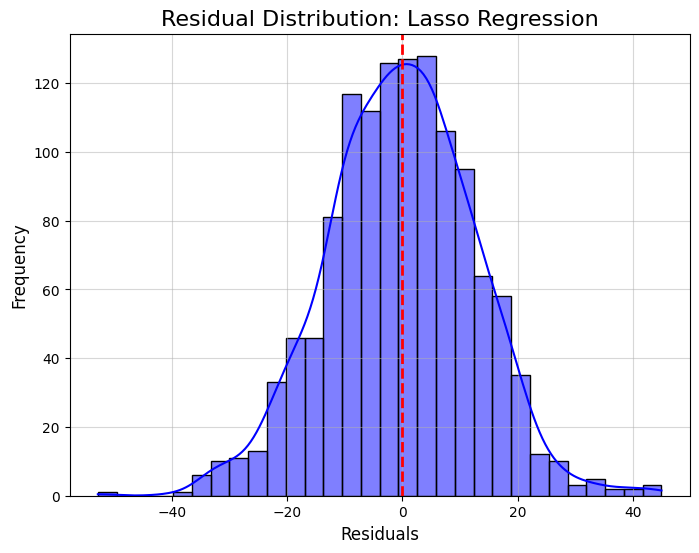

In [142]:
plot_residual_distribution(y_true, y_pred, 'Lasso Regression')